## Teste Z
Máquina fabrica perfumes com média μ = 150 ml e desvio padrão 𝜎 = 2 ml. Uma amostra aleatória de 100 frascos de perfume é colhida e observa-se uma média de 150,2 ml. A máquina está operando corretamente (confiança = 95%)?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats

Vamos agora plotar a distribuição desses dados usando displot.

In [5]:
df = pd.read_csv('Machine1.csv')

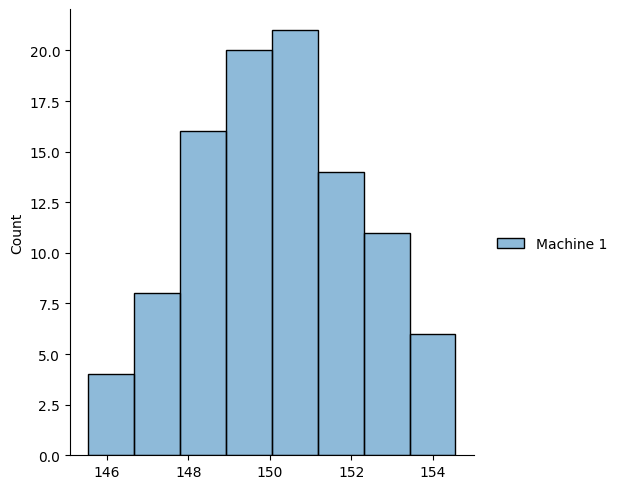

In [15]:
sns.displot(df)

Vamos plotar um boxplot dos nossos dados.

<Axes: >

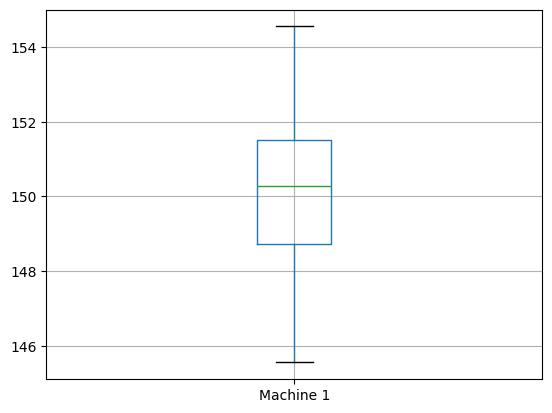

In [6]:
df.boxplot(column=['Machine 1'])

Para realizar nosso teste de hipótese (Teste Z) vamos usar weightstats.

H0: μ = 150 ml \
HA: μ <> 150 ml

In [8]:
weightstats.ztest(x1=df['Machine 1'], value=150, alternative="two-sided")

(np.float64(1.0060370247722599), np.float64(0.3143977600779597))

Tendo em vista que P Value é 0,31 (portanto, maior que 0,05), falhamos em rejeitar a hipótese nula. Assim, a máquina está operando corretamente.

## Teste t
Máquina fabrica perfumes com média μ = 150 ml. Uma amostra aleatória de 4 frascos de perfume é colhida e observa-se uma média de 151 ml e um desvio padrão amostral s = 2 ml. A máquina está operando corretamente (confiança = 95%)?

H0: μ = 150 ml \
HA: μ <> 150 ml

Vamos começar gerando as 4 amostras.

In [10]:
volume = pd.Series([148.5, 153.4, 150.9, 151.2])
volume

,0
0,148.5
1,153.4
2,150.9
3,151.2


In [11]:
volume.describe()

,0
count,4.000000
mean,151.000000
std,2.004994
min,148.500000
25%,150.300000
50%,151.050000
75%,151.750000
max,153.400000


Vamos agora realizar o Teste t.

In [12]:
stats.ttest_1samp(volume, 150)

TtestResult(statistic=np.float64(0.997509336107632), pvalue=np.float64(0.3920333832606524), df=np.int64(3))

Tendo em vista que P Value = 0,39 - maior que 0,05 - falhamos em rejeitar a hipótese nula. Assim, a máquina está operando corretamente.

Exercício 1 \
Suponha que uma máquina envase garrafas de vinho com média 750 ml e desvio padrão desconhecido. A vinícola decidiu realizar um teste de hipótese com erro alfa = 0,05 e duas caudas. Para tanto, escolheu 4 amostras do arquivo Machine2.csv. Realize o teste t e informe se a máquina está operando corretamente (hipótese nula).

H0: μ = 750 ml
Ha: μ ≠ 750 ml

In [16]:
df = pd.read_csv('Machine2.csv')

In [17]:
df4 = df.head(4)
df4

,Machine 2
0,794.21
1,781.35
2,736.66
3,745.22


In [18]:
stats.ttest_1samp(df4['Machine 2'], 750)

TtestResult(statistic=np.float64(1.0342557374997143), pvalue=np.float64(0.3770787757509829), df=np.int64(3))

Tendo em vista que P Value = 0,37 (maior que 0,05), falhamos em rejeitar a hipótese nula. Portanto, a máquina está envasando corretamente.

Exercício 2 \
Suponha que o desvio padrão da máquina seja conhecido (15 ml). Realize um teste Z com as 50 amostras disponíveis no arquivo 'machine2.csv'.

In [20]:
weightstats.ztest(x1=df['Machine 2'], value=750, alternative="two-sided")

(np.float64(0.9804661150943946), np.float64(0.32685608794791343))

Tendo em vista que P Value = 0,32 (maior que 0,05), falhamos em rejeitar a hipótese nula. Portanto, a máquina está envasando corretamente.